__Classifing Logic Gates with SVM__

__Step 1:__ Import pakages

In [3]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.decomposition import PCA

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

__Step 2:__ Import Data

In [4]:
# Read in muffin and cupcake ingredient data
gates = pd.read_csv('logic_gates.csv')
gates

,Type,E1,E2,S
0,and,0,0,0
1,and,0,1,0
2,and,1,1,1
3,or,0,0,0
4,or,0,1,1
5,or,1,1,1


__Step 3:__ Prepare the Data

In [5]:
# Specify inputs for the model
entries = gates[['E1','E2','S']].values
type_label = np.where(gates['Type'] == 'and', 0, 1)
# Feature names
gates_features = gates.columns.values[1:].tolist()
type_label

array([0, 0, 0, 1, 1, 1])

In [6]:
# Applying a dimensionality reduction to the features for visualize the data
pca = PCA(n_components=2).fit(entries)
pca_2d = pca.transform(entries)

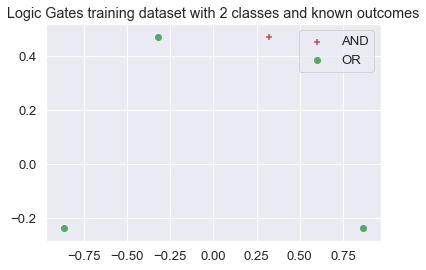

In [9]:
c1, c2, c3 = 0, 0, 0
for i in range(0, pca_2d.shape[0]):
    if type_label[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif type_label[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
plt.legend([c1, c2], ['AND', 'OR'])
plt.title('Logic Gates training dataset with 2 classes and known outcomes')
plt.show()

__Step 4:__ Fit the Model

In [5]:
# Fit the SVM model
model = svm.SVC(kernel='linear',decision_function_shape='ovr')
model.fit(entries, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

__Step 5:__ Predict New Case

In [6]:
# Create a function to guess when is an AND or a OR gate
def and_or_or(E1, E2, S):
    if(model.predict([[E1, E2, S]])) == 0:
        print('It\'s an AND gate.')
    else:
        print('It\'s an OR gate.')

In [7]:
and_or_or(1,1,1)

It's an OR gate.


In [8]:
and_or_or(1,0,1)

It's an OR gate.
